# Covariance & Correlation

![](./correlation.png)

In [5]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

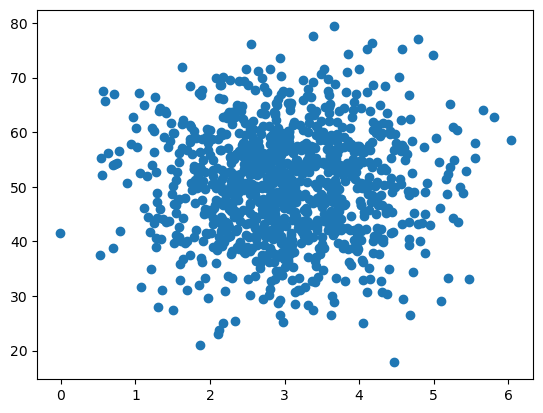

In [6]:
page_speeds = np.random.normal(3.0, 1.0, 1_000)
purchase_amount = np.random.normal(50.0, 10.0, 1_000)

plt.scatter(page_speeds, purchase_amount);

In [3]:
def covariance(x, y):
    n = len(x)
    xmean = np.mean(x)
    ymean = np.mean(y)
    tmp_x = x - xmean
    tmp_y = y - ymean
    return np.dot(tmp_x, tmp_y) / (n-1)

In [7]:
covariance (page_speeds, purchase_amount)

0.1518301711142214

7.3632582615108815

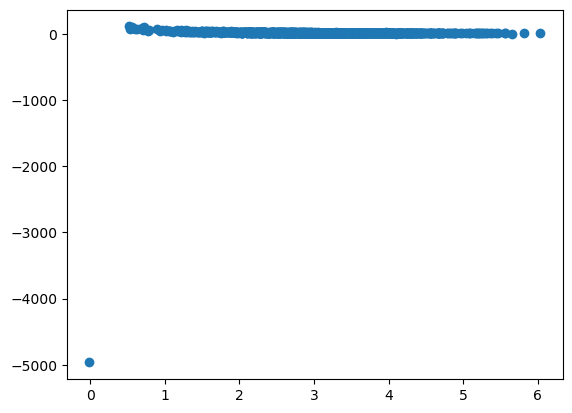

In [8]:
purchase_amount = np.random.normal(50.0, 10.0, 1000) / page_speeds

plt.scatter(page_speeds, purchase_amount)

covariance (page_speeds, purchase_amount)

In [9]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy

In [10]:
correlation(page_speeds, purchase_amount)

0.04824564359379517

In [11]:
np.corrcoef(page_speeds, purchase_amount)

array([[1.       , 0.0481974],
       [0.0481974, 1.       ]])

In [12]:
import seaborn as sns
sns.set()

In [13]:
iris = sns.load_dataset("iris")

In [14]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


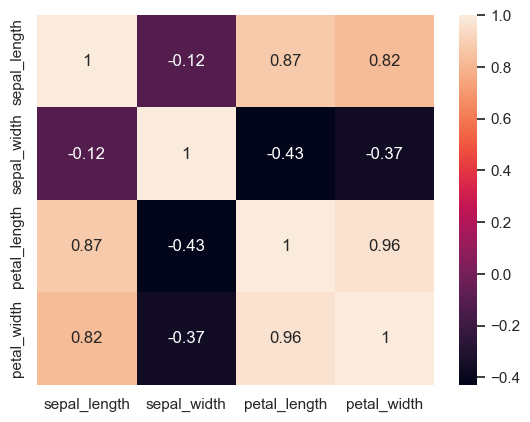

In [15]:
sns.heatmap(iris.corr(numeric_only=True), annot=True);

# Корреляция - не есть причина

https://habr.com/ru/post/236503/

# Условная вероятность - Conditional probability

![](./roulletee.jpeg)
![](./conditional_prob.jpeg)

In [18]:
p_ab = 2/6
p_a = 3/6

p_ab/p_a

0.6666666666666666

In [19]:
from numpy import random
random.seed(42)

In [28]:
data = {20:[0,0], 30:[0,0], 40:[0,0], 50:[0,0], 60:[0,0], 70:[0,0]}
total_purchases = 0
size = 100_000
for _ in range(size):
    random_age = random.choice([20, 30, 40, 50, 60, 70])
    p_purchase = float(random_age) / 100.0
    data[random_age][0] += 1
    if (random.random() < p_purchase):
        total_purchases += 1
        data[random_age][1] += 1

In [21]:
data

{20: [16700, 3360],
 30: [16654, 5009],
 40: [16346, 6548],
 50: [16809, 8508],
 60: [16791, 10018],
 70: [16700, 11681]}

In [22]:
total_purchases

45124

- A - событие, что пользователю 30 лет
- B - событие, что пользователь купит товар

In [29]:
p_BA = float(data[30][1]) / float(data[30][0])
print('P(покупка | 30 лет): ' + str(p_BA))

P(покупка | 30 лет): 0.29968246360313944


In [30]:
p_B = float(total_purchases) / size
print("P(покупки):" + str(p_B))

P(покупки):0.45077


In [31]:
p_A = float(data[30][0]) / size
print("P(30 лет): " +  str(p_A))

P(30 лет): 0.16691


In [40]:
p_A_and_B = data[30][1]/size
print('P(покупка, 30 лет)', p_A_and_B)

P(покупка, 30 лет) 0.05002


In [41]:
(p_A_and_B) / p_A

0.29968246360313944

# Bayes' Theorem

![](./byes.jpg)


## Тест на болезнь

- 1% всех людей в популяции имееют диагностируемую болезнь
- у нас есть тест, который с точностью 90% определяет заболевание у пациента
- тест выдал вам, что вы больны, с какой вероятностью вы реально больны?

In [42]:
p_a = 0.01
p_ba = 0.9

p_true_positive = p_a*p_ba
p_false_positive = (1-p_a)*(1-p_ba)
p_b = p_true_positive + p_false_positive

(p_ba * p_a) / p_b

0.08333333333333336

![](./test.jpeg)

In [104]:
90/(990+90)

0.08333333333333333